Homework - Advanced Machine Learning And Artificial Intelligence
=======
#### Deliver by the 15/06/2025 at 23:59 (11.59PM) on the Aquila portal

1. Clone this course repository if you haven't already (or download the zip file for the repository on the github portal)
2. You will need some resources from the AMLAI/Pratical folder (pratical lessions)
3. You will need some resources from the AMLAI/Homework folder  

Please run the code with the options given. 



Part 1 - Deep Learning Classification
=======

Problem Description:

We want to predict the median value of houses, with owner already - not empty for sale - in thousands of dolars ($1000's), in Boston, USA. 
For that we use a public dataset, automatically loaded with a python package. The description of the dataset can be found below, and has several characteristics of each owned house in Boston. 
The goal would be, in the end, if given a new set of characteristics of a not known house in Boston, we could predict its median value in thousands. 

__Run the code__ in the cell below.

Step 1
------

Analyze the dataset, read the description of each column and understand the problem (these are tips to think about, no need to answer):
- which columns are features?
- what is the target column, aka the column to predict?
- which units are we dealing within each column?
- which unit our target has?
- when in testing/scoring are we dealing with real units or scaled ones?

### Run the cell below:

In [8]:
# Load needed packages
import warnings
warnings.filterwarnings("ignore")

import keras
import math
print('keras using %s backend'%keras.backend.backend())
import pandas as pd
import numpy as np
import tensorflow as tf
import numpy as np
import plotly.graph_objects as go
from pandas import DataFrame
from plotly.subplots import make_subplots
from sklearn.preprocessing import scale
from tensorflow.keras.optimizers import RMSprop

# Loading the dataset
#d=load.data_boston.pkl(return_X_y=False)
d = pd.read_pickle("C:/Users/andre/Desktop/ISEG/AMLAI/Homework/datasets/data_boston.pkl")

#printing the description
print(d['DESCR'])

dataset=pd.DataFrame(d['data'])
dataset.columns=d['feature_names']
dataset['MEDV']=d['target']

keras using tensorflow backend
.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate pe

Step 2 (0.25pt)
------

Let's start by opening up our data and having a look at it.

#### #### In the cell below print the head of the dataset.


In [9]:
###
###

#dataset = pd.DataFrame(data.data, columns=data.feature_names)

d = pd.DataFrame(d['data'], columns=d.get('feature_names', []))
print(d.head())

      CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0  0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900  1.0  296.0   
1  0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671  2.0  242.0   
2  0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671  2.0  242.0   
3  0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622  3.0  222.0   
4  0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622  3.0  222.0   

   PTRATIO       B  LSTAT  
0     15.3  396.90   4.98  
1     17.8  396.90   9.14  
2     17.8  392.83   4.03  
3     18.7  394.63   2.94  
4     18.7  396.90   5.33  


Question 1 (0.5pt)
------

#### Which kind of machine learning problem we have? Explain based on the analysis of the dataset. (max number of characters is 300!)

Estamos perante um problema de Regressão, uma vez que o objetivo principal é prever um valor contínuo: a mediana dos valores de imóveis em Boston nos Estados Unidos da América. Podemos chegar a esta conclusão pelo facto que o nosso dataset apresenta características numéricas e categóricas que influenciam diretamente o valor dos imóveis, tais como a proporção de zona residenciais destinadas a lotes acima dos 25 000 sq ft,o número médio de quartos por imóvel, a concentração de óxido nítroso na região, entre outros; e o objetivo do problema é prever a mediana de um imóvel nunca antes testado, apenas tendo em conta as suas características, assim sendo estamos a prever um valor contínuo e não uma classe.

Step 3 (0.25pt)
------

Decide if you want to normalize training choosing True/False.

### In the cell below replace as you think is the best option:
#### 1. `&lt;normalizetraining&gt;` with `'True' or 'False'`
#### and then __run the code__.&lt;/normalizetraining&gt;

In [10]:
###
# REPLACE <normalizeTraining> with 'True' or 'False'
###
normalize_train='True'

Step 4 (0.25pt)
------

Identify the column to remove in X/features and the column to have exclusively in y/target

### In the cell below replace as you think is the best option:
#### 1. Replace `<column_name>` with the name column
#### Take note of the variables names you are creating in train_test_split function for Step 7 and 8
#### and then __run the code__.&lt;/column_name&gt;

In [11]:
from sklearn.model_selection import train_test_split # dividir o conjunto de dados em dados de treino e em dados de teste
X = dataset.loc[:, dataset.columns != 'B']  # seleciona todas as colunas excepto a B
y = dataset.loc[:, dataset.columns == 'MEDV'] # seleciona a variável que queremos prever
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=123)

####  __run the code__.

In [12]:
# Normalize train only
if normalize_train==True:
    mean = X_train.mean(axis=0)
    std = X_train.std(axis=0)
    X_train = (X_train - mean) / std
    X_test = (X_test - mean) / std

## Step 5 (2.5 pts)

In this step you can build the model, having in mind your dataset and your problem type.


Our **first layer** is our **input layer**

Our __second layer__ is our 1st hidden layer

Our __third layer__ is our second hidden layer

Our **final layer** will be the **output layer**

### In the cell below replace:
#### 1. Add the first layer to the model
#### 2. `<inputnodes>` with the correct number
#### 5. `<outputnotes>` with the correct number

#### and then __run the code__.

In [13]:
### Set a randomisation seed for replicatability.
np.random.seed(6)


# This creates our base model for us to add to
###
# ADD THE FIRST KERAS LAYER HERE
###
model = keras.Sequential()

###

###
# REPLACE THE <inputNodes>, <outputNotes> BELOW WITH THE APPROPRIATE NUMBERS OF NODES 
###
structure = [X_train.shape[1] , 128, 64,1]
###

# Input layer + hidden layer 1
model.add(keras.layers.Dense(units=structure[1], input_dim = structure[0], activation = 'relu'))

# Hidden layer 2
model.add(keras.layers.Dense(units=structure[2], activation = 'relu'))

#output layer
model.add(keras.layers.Dense(units=structure[3], activation='linear'))

Step 6 (0.5pt)
------

Now we'll look at how different activation functions impact the performance.

### In the cell below replace:
#### 1. `<activationfunction>` with one of the following: `'relu'`, `'linear'`
#### and then __run the code__.&lt;/activationfunction&gt;

In [14]:
###
# REPLACE THE <addActivationFunctions> BELOW WITH ONE THE APPROPRIATE STRING AS DESCRIBED ABOVE
###

print("Layer structure:", structure)
model.summary()

Layer structure: [13, 128, 64, 1]


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 128)            │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 10,113 (39.50 KB)

 Trainable params: 10,113 (39.50 KB)

 Non-trainable params: 0 (0.00 B)

Question 2
------

#### 2.1 What is the meaning of 'Total params' printed in previous cell? (1 pt)

The "Total Params 2 printed in the previous cell refers to all non-trainable and trainable parameters in the neural network model. Represents the sum of all weights and bias in the network. In this case,  we don't have any non-trainable parameters, so we don't have any fixed parameters from layers, all the parameters are ajusted during the model's training.

#### 2.2 What you would expect in terms of performance metrics, training time and total number of parameters if you had a layer structure like this: (1.5 pts)

\[ `<inputnodes>`, 1280, 640, `<outputnotes>` ]

In terms of the number of parameters, each layer adds a new set of biases and weights. In this case, the first layer has 1280 neurons and the second layer has 640 neurons.
Due to a high number of neurons, the training time probably will increase. However, this training time is also affected by the batch size and optimizer efficiency.
This dataset has a high capacity so that it can detect complex relationships in the data. Although, the dataset has a risk of overfitting, where the model can learn specific patterns in the model, but can't generalize well to new data.


#### (max number of characters is 300! for 2.1 and 2.2 together)


Step 7 (0.5 pt)
-------

Next up we'll compile it and see how it runs.

There's a few parameters you can chose that change how the model trains, and end up changing how the model performs.

We will use some standard parameters for now. Feel free to experiment with some different parameters later on.



### In the below COMPILE THE LOSS:
#### 1. with one of the following loss: `'categorical_crossentropy'`, `'mse'`, `'binary_crossentropy'`
#### 2. with one of the optimizers: `<addoptimizer>` with `'sgd'`
#### 3. with one of the following metrics: `'accuracy'`, `'mae'`, `'cosine_similarity'`
#### 4. `<addtrainx>` with correct variable name
#### 5. `<addtrainy>` with correct variable name

#### and then __run the code__.

In [15]:
# Let's compile the model

###
# REPLACE THE <addLoss>, <addOptimizer>, AND <addMetric> (INCLUDING THE QUOTES)
###
# Compilar o modelo
model.compile(loss='mse', optimizer='adam', metrics=['mae'])


Step 7 part 2 (0.5 pt)

Fit the model with trainX and Trainy

#### 4. Set the value of epochs to 100 and validation_split to 0.05


In [16]:
print('Starting training')

training_stats = model.fit(X_train, y_train, epochs=100, validation_split=0.05, verbose=1)


Starting training
Epoch 1/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 330.8510 - mae: 13.9020 - val_loss: 127.5389 - val_mae: 8.2322
Epoch 2/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 109.4784 - mae: 8.1074 - val_loss: 77.3513 - val_mae: 5.8149
Epoch 3/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 53.7611 - mae: 5.5341 - val_loss: 66.8382 - val_mae: 6.1045
Epoch 4/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 36.7374 - mae: 4.6226 - val_loss: 51.4431 - val_mae: 5.5477
Epoch 5/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 27.8655 - mae: 4.0692 - val_loss: 35.4573 - val_mae: 4.5479
Epoch 6/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 18.5411 - mae: 3.3268 - val_loss: 23.1278 - val_mae: 4.0410
Epoch 7/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 12.6090 - mae: 2.6513 - val_loss: 16.7212 - val_mae: 3.1350
Epoch 8/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 11.9924 - mae: 2.4641 - val_loss: 12.9053 - val_mae: 3.1408
Epoch 9/100
11/11 ━━━━━━━━

#### Lets print the metrics! Run the cell below.

In [17]:
print('Training finished')
print('Training Evaluation: mean_absolute_error = %f , loss = %f'
      %(training_stats.history['mae'][-1], training_stats.history['loss'][-1]))
print('Validation Evaluation: mean_absolute_error = %f , loss = %f'
      %(training_stats.history['val_mae'][-1], training_stats.history['val_loss'][-1]))

Training finished
Training Evaluation: mean_absolute_error = 0.243951 , loss = 0.114068
Validation Evaluation: mean_absolute_error = 0.470617 , loss = 0.370032


#### Lets plot it! Run the cell below.

In [18]:
fig = go.Figure()
fig.add_trace(go.Scattergl(y=training_stats.history['loss'],
                    name='Train'))
fig.add_trace(go.Scattergl(y=training_stats.history['val_loss'],
                    name='Valid'))
fig.update_layout(height=500, width=700,
                  xaxis_title='Epoch',
                  yaxis_title='Loss')
fig.show()

In [19]:
training_stats.history

fig = go.Figure()
fig.add_trace(go.Scattergl(y=training_stats.history['loss'], 
                         name='Train Loss',
                         line=dict(color='blue')))
fig.add_trace(go.Scattergl(y=training_stats.history['val_loss'], 
                         name='Val Loss',
                         line=dict(color='red')))
fig.update_layout(title='Loss Over Epochs',
                 xaxis_title='Epoch',
                 yaxis_title='Loss')
fig.show()

In [20]:
fig = go.Figure()
fig.add_trace(go.Scattergl(y=training_stats.history['mae'], name='mae Train'))
fig.add_trace(go.Scattergl(y=training_stats.history['val_mae'], name='mae Value'))
fig.update_layout(height=500, width=700,
                  xaxis_title='Epoch',
                  yaxis_title='mae')
fig.show()

Question 3
------

#### 3.1 Justify your previous choices in Step  (0.5 pt)

Escolhi “mse” como função de perda e “mae” como métrica por serem adequadas para regressão. Usei “sgd” como otimizador pela simplicidade e eficácia. A arquitetura foi definida para capturar relações não lineares nos dados.

#### 3.3 If you were asked to stop the training after 4 epochs, which regularization technique were you applying? Would this be a good approach for this problem? Why? (1,5 pt)

Seria early stopping, que evita overfitting. Neste caso não seria ideal, pois os gráficos mostram que o modelo ainda aprende significativamente após 4 épocas.



Step 8 (0.25pt)
------

Now that our model is trained and ready, let's see how it performs on our test data!



### In the cell below EVALUATE the model on the test dataset 
#### and then __run the code__.


In [21]:
###
# REPLACE <addTestX>  AND <addTestY> 
###
evaluation = model.evaluate(X_test, y_test)
###

print('Test Set Evaluation: loss = %0.6f, mae = %0.2f' %(evaluation[0], evaluation[1]))

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.2824 - mae: 0.4357 
Test Set Evaluation: loss = 0.286905, mae = 0.44


Question 4
------

#### 4.1 Why is important to test the model on test dataset? (0.5 pts)

É importante testar no conjunto de teste para avaliar a capacidade de generalização do modelo, verificando se ele consegue prever dados nunca vistos e evitando conclusões baseadas apenas nos dados de treino.

#### 4.2 Please correlate the results with the problem and write 1 or 2 setences about it (0.5 pts)

O erro baixo no conjunto de teste mostra que o modelo consegue prever o valor das casas com boa precisão, indicando que foi capaz de aprender padrões relevantes sem sobreajustar aos dados de treino.



Part 2 - CNN Training
=======
Problem Description:

We will train a CNN to recognise cats and dogs. The train folder archive 200 images of cats and 200 images of dogs. Train your algorithm on these files and predict the labels for test (1 = dog, 0 = cat). The test folder has images of cats and dogs.

#### Run the code below to import our required libraries 

In [100]:
import numpy as np
import pandas as pd 
from tensorflow.keras.utils import load_img
from keras.utils import to_categorical
from keras.callbacks import EarlyStopping, ReduceLROnPlateau
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import random
import os


### Run the cell below:

In [101]:
os.chdir(r"C:/Users/andre/Desktop/ISEG/AMLAI/Homework")
filenames = os.listdir("datasets/train")
categories = []
for filename in filenames:
    category = filename.split('.')[0]
    if category == 'dog':
        categories.append(1)
    else:
        categories.append(0)

df = pd.DataFrame({
    'filename': filenames,
    'category': categories
})
df.head()

filename  category
0    cat.1.jpg         0
1   cat.10.jpg         0
2  cat.100.jpg         0
3  cat.101.jpg         0
4  cat.102.jpg         0


### Run the cell below:

<Axes: xlabel='category'>

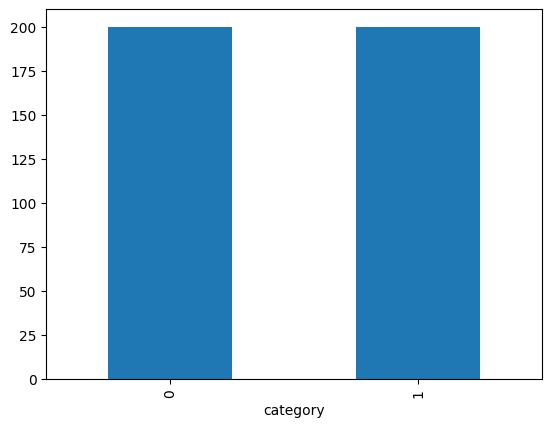

In [102]:
df['category'].value_counts().plot.bar()


### Run the cell below to see some of the images within the train dataset:

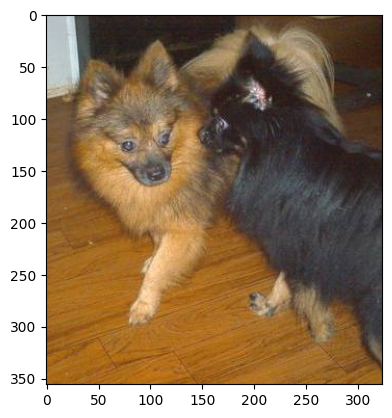

In [103]:
#run several times to choose a random picture
sample = random.choice(filenames)
image = load_img(r"C:\Users\andre\Desktop\ISEG\AMLAI\Homework\datasets\train\\" + sample)
plt.imshow(image)

Step 1 (0.5pt)
------
Seeing the images from the previous plot, choose the following parameters with integers

### In the cell below replace as you think is the best option:
#### 1. `<IMAGE_WIDTH>`
#### 2. `<IMAGE_HEIGHT>`
#### 3. `<IMAGE_CHANNELS>` 
#### and then __run the code__.

In [104]:
IMAGE_WIDTH = 128
IMAGE_HEIGHT = 128
IMAGE_SIZE = (IMAGE_WIDTH, IMAGE_HEIGHT)
IMAGE_CHANNELS = 3

Step 2 (1pt)
------

Decide if you want to normalize training choosing True/False.

### In the cell below replace as you think is the best option:
#### 1. `<shape0>, <shape1>, <shape3>` with integers as the shape of each input image
#### 2. `<OUTPUT_DIM>` with integer corresponding to the output dimension
#### 3. `<loss>` with string corresponding to the loss function
#### 4. `<metrics>` with string corresponding to the metric used in this problem
#### and then __run the code__.

In [105]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense, Activation, BatchNormalization

model = Sequential()

#BLOCK A: LINE 7-10
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
#BLOCK B: LINE 12-15
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
#BLOCK C: LINE 17-20
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
#BLOCK D: LINE 22-26
model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(2, activation='softmax')) 

model.compile(loss='categorical_crossentropy', optimizer='rmsprop', metrics=["accuracy"])

model.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_9 (Conv2D)               │ (None, 126, 126, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_12          │ (None, 126, 126, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_9 (MaxPooling2D)  │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_12 (Dropout)            │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_10 (Conv2D)              │ (None, 61, 61, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_13          │ (None, 61, 61, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_10 (MaxPooling2D) │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_13 (Dropout)            │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_11 (Conv2D)              │ (None, 28, 28, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_14          │ (None, 28, 28, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_11 (MaxPooling2D) │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_14 (Dropout)            │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_3 (Flatten)             │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 512)            │    12,845,568 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_15          │ (None, 512)            │         2,048 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_15 (Dropout)            │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 2)              │         1,026 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 12,942,786 (49.37 MB)

 Trainable params: 12,941,314 (49.37 MB)

 Non-trainable params: 1,472 (5.75 KB)

Step 3
------


### Answer to the following question:
#### 1. Which blocks correspond to the feature mapping part of the CNN? What is feature mapping doing? (1pt)


Os blocos que correspondem à parte de mapeamento de características são os Blocos A, B e C. Eles incluem as camadas Conv2D, BatchNormalization, MaxPooling2D e Dropout.
O mapeamento de características é responsável por extrair, através de filtros, padrões e informações relevantes das imagens, como bordas, texturas e formas. Essas características permitem que a rede reconheça diferentes objetos e estruturas presentes nas imagens.

#### 2. Which blocks correspond to the classifcation part of the CNN? What is the classifcation part doing? (1pt)


A parte de classificação corresponde ao Bloco D, que inclui as camadas Flatten, Dense, BatchNormalization, Dropout e a última camada Dense (de saída).
A parte de classificação pega as características extraídas pelo mapeamento, transforma os dados em um vetor e, por meio de camadas totalmente conectadas, realiza a predição de qual classe a imagem pertence (neste caso, gato ou cachorro), retornando as probabilidades para cada classe.

#### 3. Which operation is happening in MaxPooling2D? (1pt)

A operação realizada na camada MaxPooling2D é a redução das dimensões espaciais das imagens (ou mapas de características), selecionando o maior valor em cada janela (por exemplo, 2x2) da imagem. Isso diminui o tamanho dos dados, reduz o custo computacional e torna as características mais robustas a pequenas variações e deslocamentos na imagem.


### Run the cell below:

In [106]:
earlystop = EarlyStopping(patience=10)
learning_rate_reduction = ReduceLROnPlateau(monitor='val_accuracy', 
                                            patience=2, 
                                            verbose=1, 
                                            factor=0.5, 
                                            min_lr=0.00001)
callbacks = [earlystop, learning_rate_reduction]
df["category"] = df["category"].replace({0: 'cat', 1: 'dog'}) 
train_df, validate_df = train_test_split(df, test_size=0.20, random_state=42)
train_df = train_df.reset_index(drop=True)
validate_df = validate_df.reset_index(drop=True)


### Run the cells below:

<Axes: xlabel='category'>

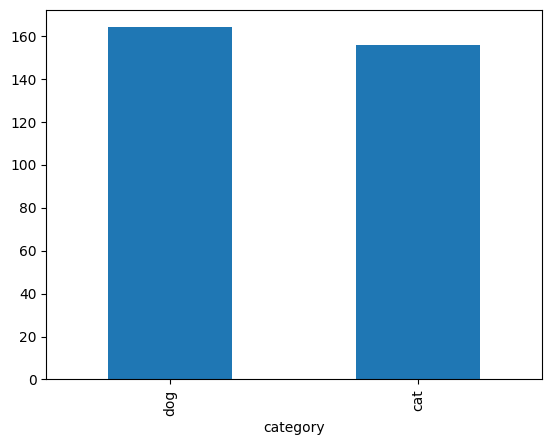

In [107]:
#train dataset size
train_df['category'].value_counts().plot.bar()

<Axes: xlabel='category'>

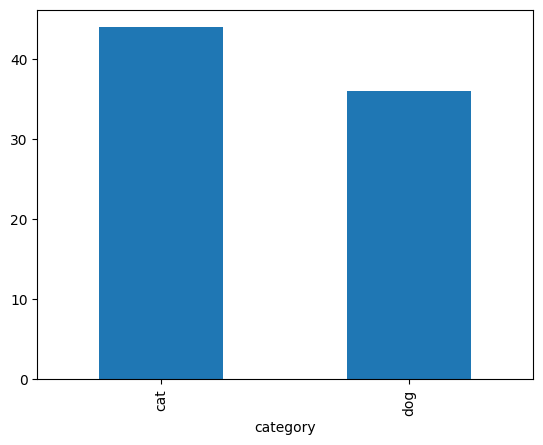

In [108]:
#validate dataset size
validate_df['category'].value_counts().plot.bar()

In [109]:
total_train = train_df.shape[0]
total_validate = validate_df.shape[0]
batch_size=15

Step 4 (0.5pt)
------

The next cell is doing some data augmentation. This topic was related with the theoretical classes, but not explicitly explained. 
Replace by the value that makes sense in 1, and answer the question in step 4.
To check what each parameter is doing you can try several values and run the cell on Step 4 to see its effect. (might help to answer in 4)

### In the cell below replace as you think is the best option:
#### 1. `<rescale_size>` with the integer representing the maximum value within the images pixel values

#### Try out the different rotation_range, zoom_range and horizontal_flip parameters to help answering the next question

#### and then __run the code__.

In [110]:
train_datagen = ImageDataGenerator(
    rotation_range=15,
    rescale=1./255, 
    shear_range=0.1,
    zoom_range=0.2,
    horizontal_flip=True,
    width_shift_range=0.1,
    height_shift_range=0.1
)

### Run the cell below:

In [111]:
train_generator = train_datagen.flow_from_dataframe(
    train_df, 
    "datasets/train", 
    x_col='filename',
    y_col='category',
    target_size=IMAGE_SIZE,
    class_mode='categorical',
    batch_size=batch_size
)

validation_datagen = ImageDataGenerator(rescale=1./255)
validation_generator = validation_datagen.flow_from_dataframe(
    validate_df, 
    "datasets/train", 
    x_col='filename',
    y_col='category',
    target_size=IMAGE_SIZE,
    class_mode='categorical',
    batch_size=batch_size
)

example_df = train_df.sample(n=1).reset_index(drop=True)
example_generator = train_datagen.flow_from_dataframe(
    example_df, 
    "datasets/train", 
    x_col='filename',
    y_col='category',
    target_size=IMAGE_SIZE,
    class_mode='categorical'
)

Found 320 validated image filenames belonging to 2 classes.
Found 80 validated image filenames belonging to 2 classes.
Found 1 validated image filenames belonging to 1 classes.


Step 5 
------

Change the values on Step 4 and run the cell bellow after, to see the parameters' effect.
Answer the question after.


#### and then __run the code__.

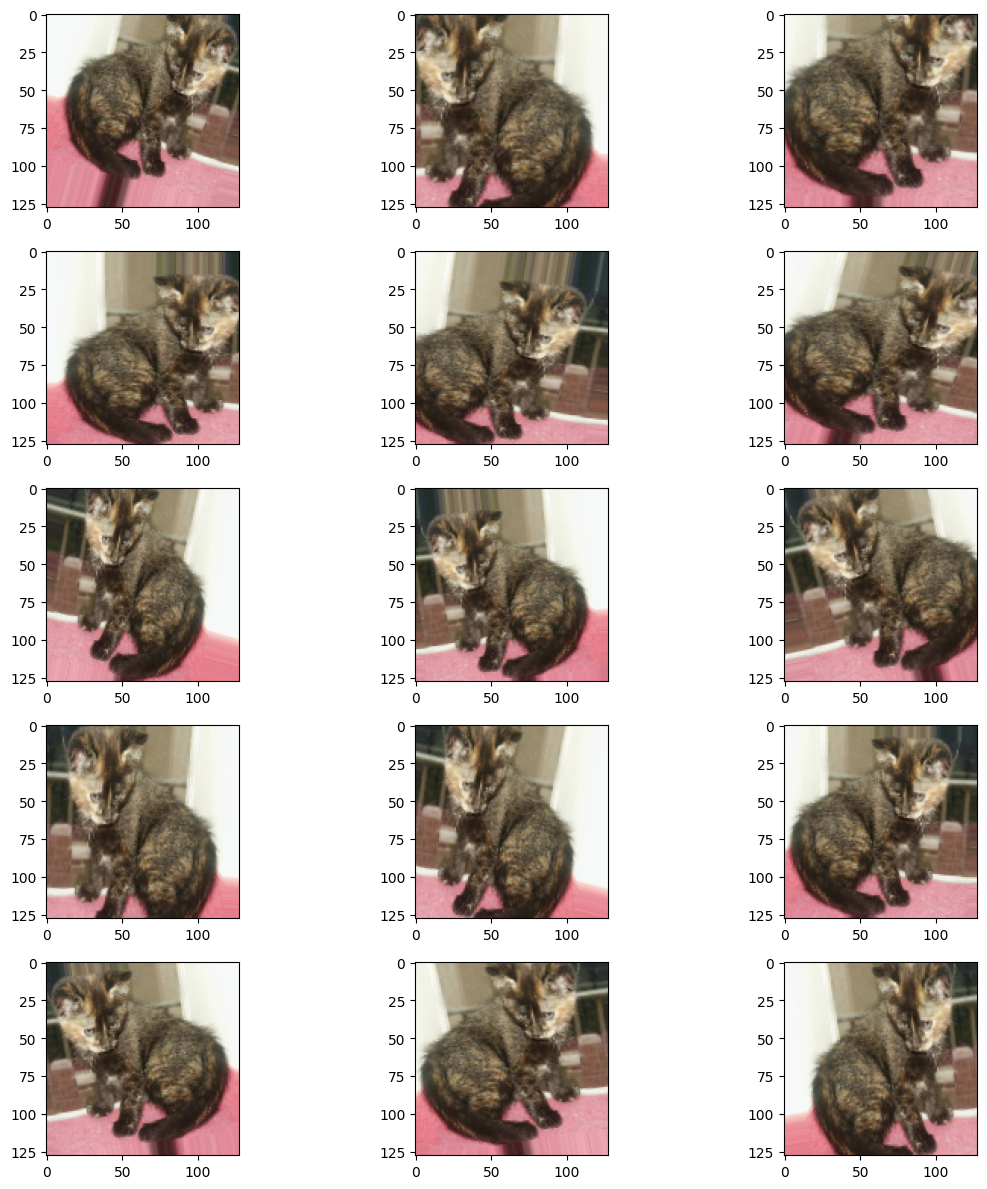

In [112]:
plt.figure(figsize=(12, 12))
for i in range(0, 15):
    plt.subplot(5, 3, i+1)
    for X_batch, Y_batch in example_generator:
        image = X_batch[0]
        plt.imshow(image)
        break
plt.tight_layout()
plt.show()

Step 5 (1pt)
------


### Answer to the following question:
#### 1.What is the objective of data augmentation done in Step 4 and ploted in Step 5? 

*INSERT ANSWER HERE*

### Run the cell below to train (might take arround 7 minutes):

In [113]:
history = model.fit(
    train_generator, 
    epochs=3,
    validation_data=validation_generator,
    validation_steps=total_validate//batch_size,
    steps_per_epoch=total_train//batch_size,
    callbacks=callbacks
)
model.save_weights("model.weights.h5")

Epoch 1/3
21/21 ━━━━━━━━━━━━━━━━━━━━ 3s 113ms/step - accuracy: 0.5111 - loss: 2.4241 - val_accuracy: 0.4533 - val_loss: 1.5562 - learning_rate: 0.0010
Epoch 2/3
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6667 - loss: 1.3074 - val_accuracy: 0.4533 - val_loss: 1.6381 - learning_rate: 0.0010
Epoch 3/3
21/21 ━━━━━━━━━━━━━━━━━━━━ 2s 108ms/step - accuracy: 0.5844 - loss: 1.2218 - val_accuracy: 0.5733 - val_loss: 1.1167 - learning_rate: 0.0010


Step 6 (1.5pt)
------


### Answer to the following question:
#### 1.What is the definition of epoch, batch size and training dataset size? 

*INSERT ANSWER HERE*

### Run the cells below:

In [125]:
# 1. List filenames and build the DataFrame
filenames = os.listdir("datasets/test")
categories = []
for filename in filenames:
    category = filename.split('.')[0]
    if category == 'dog':
        categories.append(1)
    else:
        categories.append(0)

test_df = pd.DataFrame({
    'filename': filenames,
    'category': categories
})

test_df["category"] = test_df["category"].replace({0: 'cat', 1: 'dog'}) 
test_df = test_df.reset_index(drop=True)

# 2. Create the ImageDataGenerator for test
test_gen = ImageDataGenerator(rescale=1./255)

# 3. Prepare the generator
IMAGE_SIZE = (128, 128)  

nb_samples = test_df.shape[0]
test_generator = test_gen.flow_from_dataframe(
    test_df, 
    "datasets/test", 
    x_col='filename',
    y_col='category',
    target_size=IMAGE_SIZE,    
    class_mode='categorical'
)

Found 200 validated image filenames belonging to 2 classes.


In [126]:
predict = model.predict(test_generator, steps=int(np.ceil(nb_samples/batch_size)))

14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step


In [127]:
predict = model.predict(test_generator, steps=int(np.ceil(nb_samples / batch_size)))
test_df['category_predicted'] = np.argmax(predict, axis=-1)
test_df['category_predicted'] = test_df['category_predicted'].replace({0: 'cat', 1: 'dog'})


14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step


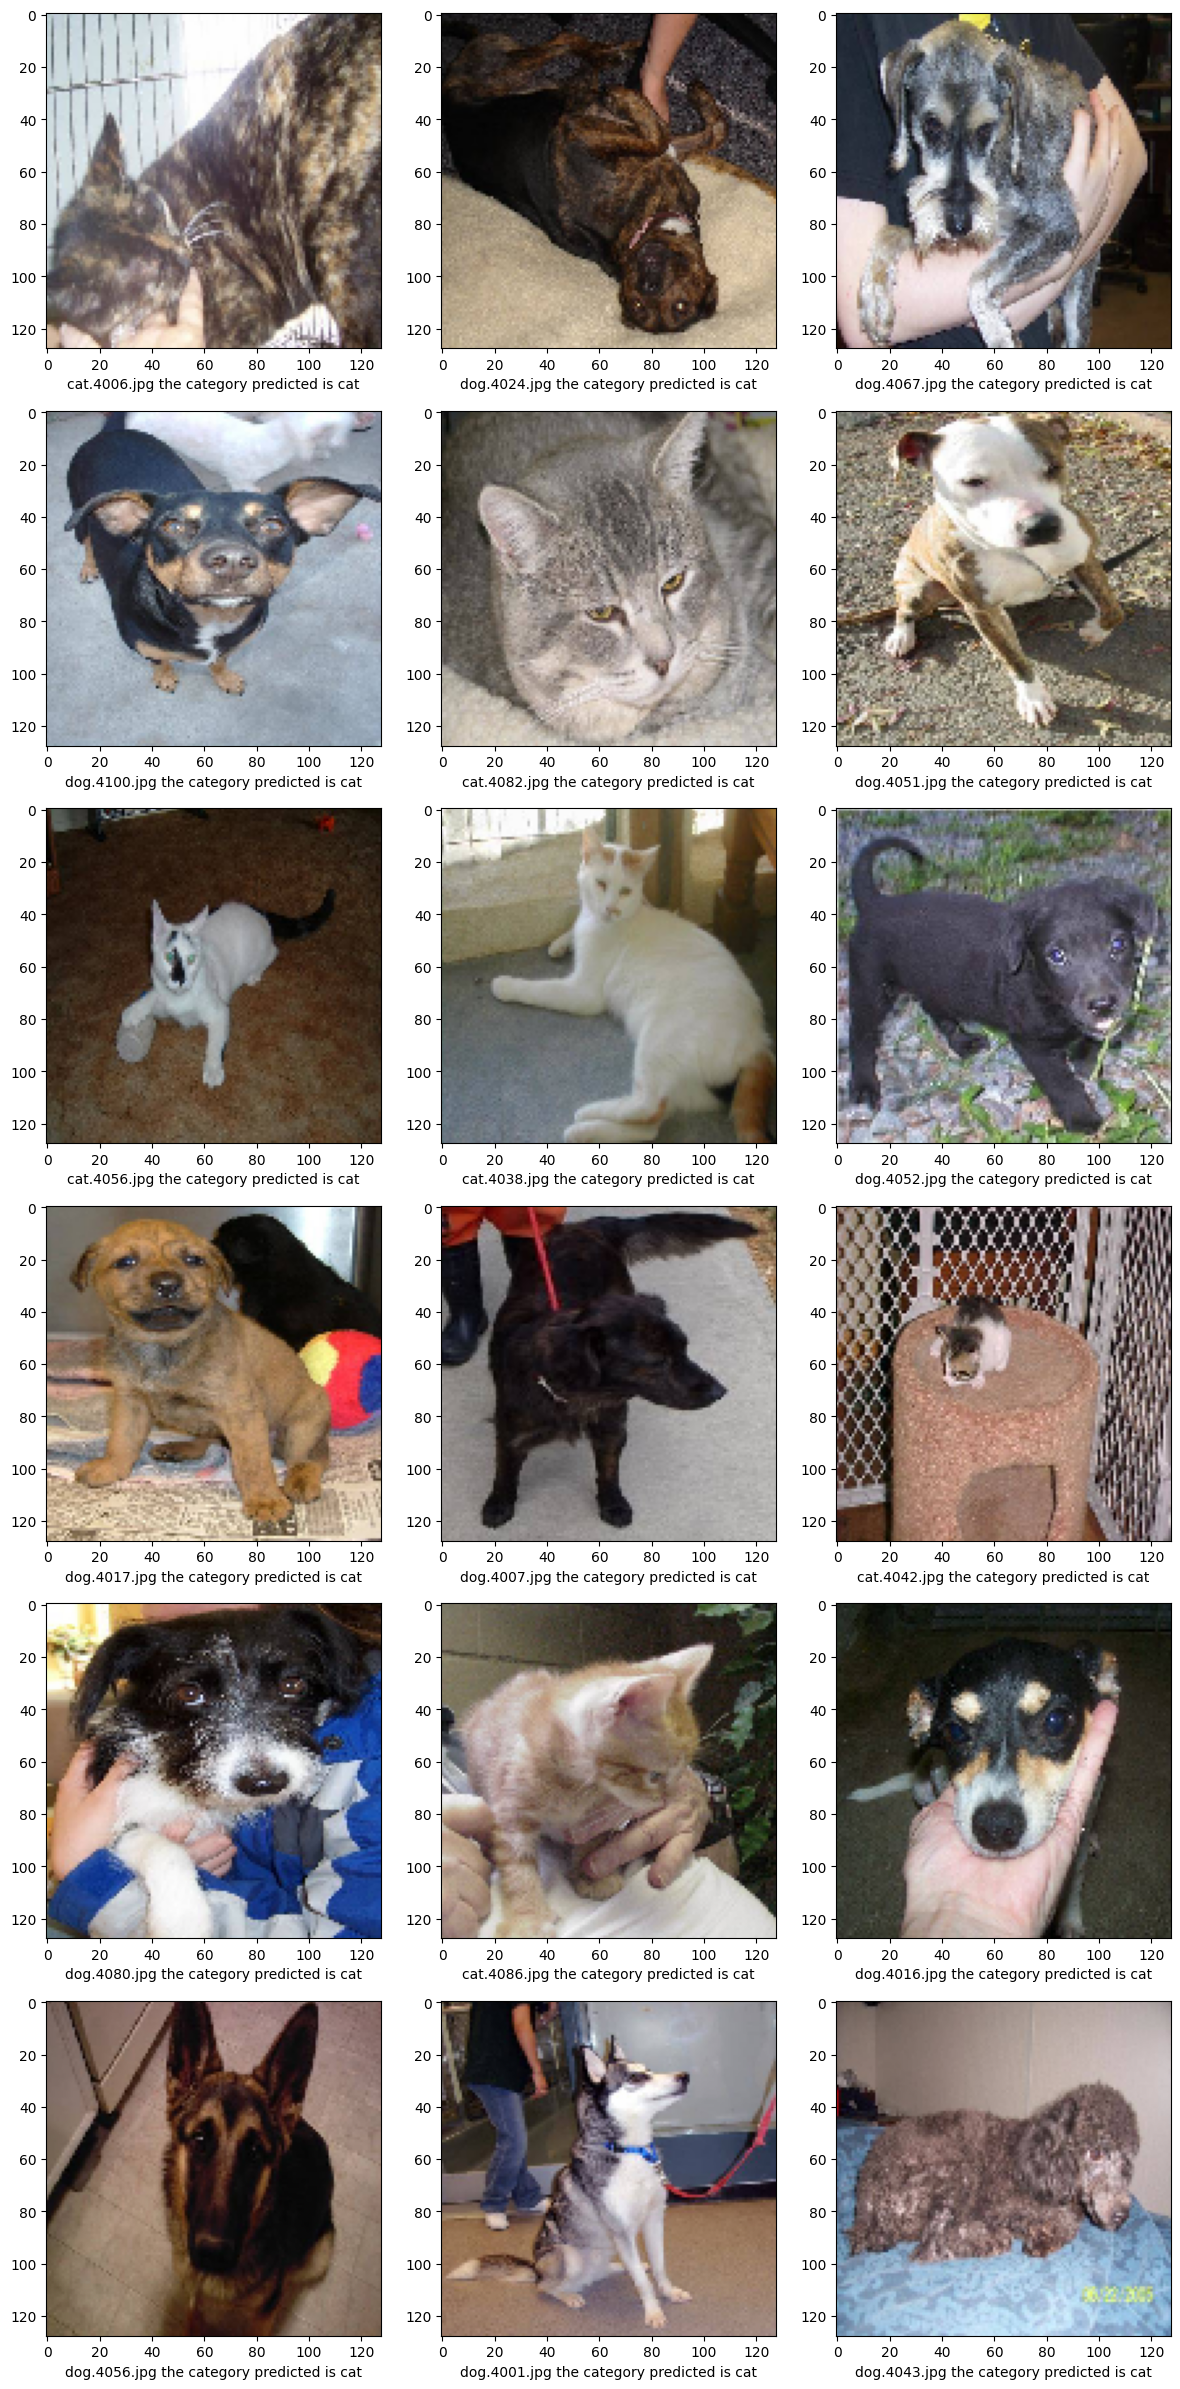

In [128]:
sample_test = test_df.sample(n=18)
sample_test.head()
plt.figure(figsize=(12, 24))
i = 0
for index, row in sample_test.iterrows():
    i = i+1
    filename = row['filename']
    category = row['category_predicted']
    img = load_img("datasets/test/"+filename, target_size=IMAGE_SIZE)
    plt.subplot(6, 3, i)
    plt.imshow(img)
    plt.xlabel(filename + ' the category predicted is ' + "{}".format(category) + '' )
plt.tight_layout()
plt.show()

Step 7 (1.5pt)
------


### Answer to the following question:
#### 1. How is the model performing? Find out the accuracy.
#### Find 2 reasons that might justify the model's performance

*INSERT ANSWER HERE*

In [130]:
from sklearn.metrics import accuracy_score
#FIND OUT THE ACCURACY OF THE MODEL
y_true = test_df['category'].replace({'cat': 0, 'dog': 1}).values
y_pred = test_df['category_predicted'].replace({'cat': 0, 'dog': 1}).values

accuracy = accuracy_score(y_true, y_pred)
print(f"Test accuracy: {accuracy:.2f}")

Test accuracy: 0.50
